# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Awojide Margaret</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyze missing values

In [4]:
print ("The Description of the churn dataset:\n")
data.describe()

The Description of the churn dataset:



,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [5]:
print ("The general information about the dataset:\n")
data.info()

The general information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
print ("The dataset has {} rows and {} columns".format(data.shape[0],data.shape[1]))

The dataset has 3333 rows and 11 columns


In [7]:
print ("Accessing the Missing Values in the dataset per column\n")
data.isnull().sum()

Accessing the Missing Values in the dataset per column



Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

# Exploratory Data Analysis

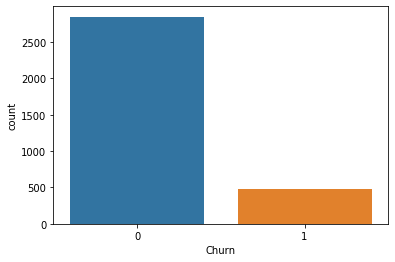

In [8]:
# Our label Distribution (countplot)
sns.countplot(x='Churn',data=data)

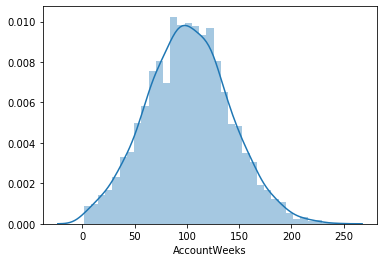

In [9]:
# DistPlot of Account Weeks
sns.distplot(data["AccountWeeks"])

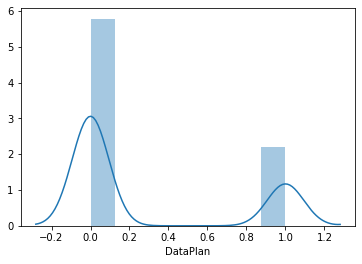

In [10]:
sns.distplot(data['DataPlan'])

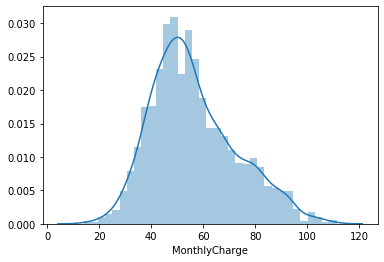

In [11]:
sns.distplot(data["MonthlyCharge"])
plt.show()

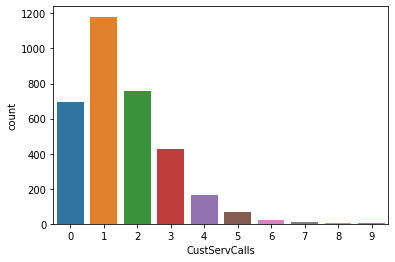

In [12]:
sns.countplot(data["CustServCalls"])
plt.show()

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [13]:
#Test for Duplicates
print ("The number of duplicates in the datasets is {}".format(data.duplicated().sum()))
print ("There are no duplicates")

The number of duplicates in the datasets is 0
There are no duplicates


In [14]:
from scipy import stats
z=np.abs(stats.zscore(data))
len(np.where(z>3)[0])
outliers=list(set(np.where(z>3)[0]))
data2=data.drop(outliers,axis=0)
data2.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7


Feature Scaling is necessary because the features are not in the same range. Standard Scaler was chosen to normalize the dataset. There is no need to generate new features by means of feature extraction in the dataset.

In [15]:
X=data.drop(["Churn"],axis=1)
y=data["Churn"]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,f1_score
model1=LogisticRegression(C=0.1,random_state=21)
model1.fit(X_train,y_train)
pred1=model1.predict(X_test)
print ("The train score for Logistic Regression is:",model1.score(X_train,y_train))
print ("The test score for Logistic Regression is:",model1.score(X_test,y_test))
print ("The Confusion matrix:\n")
cm=confusion_matrix(y_test,pred1)
print (cm)
print ("The Classification Report: \n",classification_report(y_test,pred1))
print ("The f1 score is:",f1_score(y_test,pred1,average="weighted"))

The train score for Logistic Regression is: 0.8598371195885126
The test score for Logistic Regression is: 0.867
The Confusion matrix:

[[839  13]
 [120  28]]
The Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.93       852
           1       0.68      0.19      0.30       148

    accuracy                           0.87      1000
   macro avg       0.78      0.59      0.61      1000
weighted avg       0.85      0.87      0.83      1000

The f1 score is: 0.8332808965785223


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score
model2=DecisionTreeClassifier(max_depth=4,random_state=21)
model2.fit(X_train,y_train)
pred2=model2.predict(X_test)
print ("The train score for Decision Tree Classifier is:",model2.score(X_train,y_train))
print ("The test score for Decision Tree Classifier is:",model2.score(X_test,y_test))
print ("The Confusion matrix:\n")
cm=confusion_matrix(y_test,pred2)
print (cm)
print ("The Classification Report: \n",classification_report(y_test,pred2))
print ("The f1 score is:",f1_score(y_test,pred2,average="weighted"))

The train score for Decision Tree Classifier is: 0.9288469781397343
The test score for Decision Tree Classifier is: 0.919
The Confusion matrix:

[[844   8]
 [ 73  75]]
The Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       852
           1       0.90      0.51      0.65       148

    accuracy                           0.92      1000
   macro avg       0.91      0.75      0.80      1000
weighted avg       0.92      0.92      0.91      1000

The f1 score is: 0.9090920249902725


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
model3=RandomForestClassifier(max_depth=7,random_state=21)
model3.fit(X_train,y_train)
pred3=model3.predict(X_test)
print ("The train score for Random Forest Classifier is:",model3.score(X_train,y_train))
print ("The test score for Random Forest Classifier is:",model3.score(X_test,y_test))
print ("The Confusion matrix:\n")
cm=confusion_matrix(y_test,pred3)
print (cm)
print ("The Classification Report: \n",classification_report(y_test,pred3))
print ("The f1 score is:",f1_score(y_test,pred3,average="weighted"))

The train score for Random Forest Classifier is: 0.9601371624517788
The test score for Random Forest Classifier is: 0.935
The Confusion matrix:

[[843   9]
 [ 56  92]]
The Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       852
           1       0.91      0.62      0.74       148

    accuracy                           0.94      1000
   macro avg       0.92      0.81      0.85      1000
weighted avg       0.93      0.94      0.93      1000

The f1 score is: 0.9297378204995883


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

My best performing model is the RandomForestClassifier which is like a combination of many decision trees. It maximizes the recall  and the precision and has an overall better accuracy. It also has a higher f1_score. 

The model can be further improved by adding more features, and eradicating outliers as some data was lost due to the presence of outliers. 